# Get Data



In [85]:
import pandas as pd
df = pd.read_csv("export-782032880420-pm10-1h.csv")

In [86]:
df.head()

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,0,2021-02-11 12:00:00,Asia/Bangkok,77.981600,7.840909,6.886364,29.734065
1,1,2021-02-11 13:00:00,Asia/Bangkok,74.392082,8.826087,7.669565,29.855901
2,2,2021-02-11 14:00:00,Asia/Bangkok,72.976484,8.965812,7.589744,30.112084
3,3,2021-02-11 15:00:00,Asia/Bangkok,72.888261,8.172414,6.931034,30.112882
4,4,2021-02-11 16:00:00,Asia/Bangkok,74.696611,9.724138,8.301724,29.639733


# Explore data


In [87]:
df.isna().sum()

Unnamed: 0     0
timestamp      0
timezone       0
humidity       0
pm_10          0
pm_2_5         0
temperature    0
dtype: int64

In [88]:
df.describe()

,Unnamed: 0,humidity,pm_10,pm_2_5,temperature
count,22094.00000,22094.000000,22094.000000,22094.000000,22094.000000
mean,11046.50000,84.385334,13.562577,11.487342,27.734730
std,6378.13276,9.015409,14.540605,10.875690,2.493405
min,0.00000,34.707136,0.000000,0.000000,20.050094
25%,5523.25000,77.723084,4.982759,4.167735,25.782700
50%,11046.50000,87.880524,9.810578,8.439655,27.056168
75%,16569.75000,91.689585,18.241379,15.789599,29.545130
max,22093.00000,98.520270,946.017241,446.250000,36.213113


<Axes: >

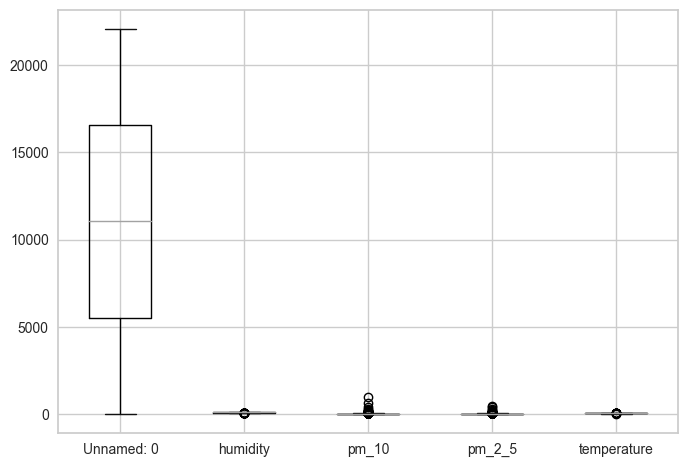

In [89]:
df.boxplot()

# Clean Data

In [90]:
df.drop(columns=["pm_2_5", "Unnamed: 0", "timezone"], inplace=True)

In [91]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by="timestamp")

In [92]:
# ฟังก์ชันลบค่าผิดปกติด้วย IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# ลบค่าผิดปกติจาก humidity, temperature และ pm_10
for col in ["humidity", "temperature", "pm_10"]:
    df = remove_outliers(df, col)

In [93]:
df.describe()

,timestamp,humidity,pm_10,temperature
count,20966,20966.000000,20966.000000,20966.000000
mean,2022-07-05 16:11:41.249642240,84.346985,11.636220,27.752261
min,2021-02-11 12:00:00,56.831776,0.000000,21.766904
25%,2021-11-03 13:15:00,77.564527,4.758698,25.792404
50%,2022-06-19 23:30:00,87.754206,9.181426,27.068804
75%,2023-03-27 07:45:00,91.706062,16.560345,29.580153
max,2023-11-17 08:00:00,98.520270,38.060345,34.995276
std,NaN,8.958190,8.776772,2.464788


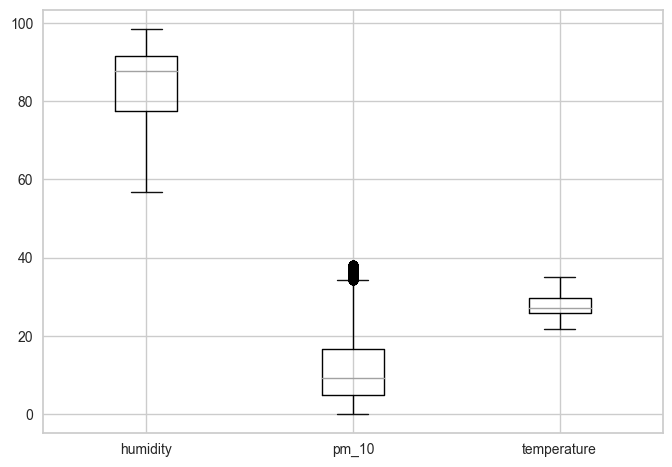

In [94]:
import matplotlib.pyplot as plt

df.boxplot()
plt.show()

# Feature Engineeering

In [95]:
# Extract time features
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["month"] = df["timestamp"].dt.month
df["day_of_week"] = df["timestamp"].dt.dayofweek

In [97]:
df["pm10_lag_1"] = df["pm_10"].shift(1)  
df["pm10_lag_3"] = df["pm_10"].shift(3)  
df["pm10_lag_6"] = df["pm_10"].shift(6)  
df["pm10_lag_24"] = df["pm_10"].shift(24)   

In [100]:
df["pm10_roll_mean_6"] = df["pm_10"].rolling(window=6).mean()  # ค่าเฉลี่ย 6 ชั่วโมงล่าสุด
df["pm10_roll_mean_24"] = df["pm_10"].rolling(window=24).mean()  # ค่าเฉลี่ย 24 ชั่วโมงล่าสุด

df["pm10_ewm_12"] = (
    df["pm_10"].ewm(span=12, adjust=False).mean()
)  # Exponential Moving Average 12 ชั่วโมง

In [121]:
df

,timestamp,humidity,pm_10,temperature,hour,day,month,day_of_week,pm10_lag_1,pm10_lag_3,pm10_lag_6,pm10_lag_24,pm10_roll_mean_6,pm10_roll_mean_24,pm10_ewm_12
24,2021-02-12 12:00:00,78.682775,8.608696,29.371604,12,12,2,4,9.327586,16.478632,26.370690,7.840909,16.955647,17.927332,17.814791
25,2021-02-12 13:00:00,76.485847,8.700855,29.719043,13,12,2,4,8.608696,11.405172,31.732759,8.826087,13.116996,17.922114,16.412647
26,2021-02-12 14:00:00,77.073751,8.991379,29.572997,14,12,2,4,8.700855,9.327586,24.181034,8.965812,10.585387,17.923179,15.270914
27,2021-02-12 15:00:00,75.652491,9.365217,29.888881,15,12,2,4,8.991379,8.608696,16.478632,8.172414,9.399818,17.972879,14.362345
28,2021-02-12 16:00:00,73.876555,7.149123,30.022227,16,12,2,4,9.365217,8.700855,11.405172,9.724138,8.690476,17.865587,13.252619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22089,2023-11-16 11:00:00,96.030552,2.478261,25.317348,11,16,11,3,3.551724,3.356522,3.130435,2.931034,3.285284,4.972991,4.231866
22090,2023-11-16 12:00:00,94.645927,0.353448,24.999440,12,16,11,3,2.478261,3.456897,3.295652,2.486957,2.794917,4.884094,3.635187
22091,2023-11-16 13:00:00,93.428420,0.870690,25.441423,13,16,11,3,0.353448,3.551724,3.572650,1.491228,2.344590,4.858239,3.209879
22092,2023-11-16 14:00:00,93.736907,0.686275,24.930463,14,16,11,3,0.870690,2.478261,3.356522,2.844828,1.899549,4.768299,2.821632


In [101]:
df.dropna(inplace=True)  # ลบ missing values
# คำนวณขนาดของ Train และ Test set

train_size = int(len(df) * 0.8)  # 80%

test_size = len(df) - train_size  # 20%


# แบ่งข้อมูล

train_df = df.iloc[:train_size]

test_df = df.iloc[train_size:]


print("Train set:", train_df.shape)

print("Test set:", test_df.shape)

Train set: (16753, 15)
Test set: (4189, 15)


# Train Model


In [102]:
from pycaret.regression import *

In [107]:
exp = setup(
    data=train_df,
    target="pm_10",
    fold=10,
    session_id=123,
    remove_outliers=True,
    n_jobs=1,
)

,Description,Value
0,Session id,123
1,Target,pm_10
2,Target type,Regression
3,Original data shape,"(16753, 15)"
4,Transformed data shape,"(16166, 17)"
5,Transformed train set shape,"(11140, 17)"
6,Transformed test set shape,"(5026, 17)"
7,Numeric features,13
8,Date features,1
9,Preprocess,True


In [108]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.8739,7.7267,2.7760,0.9040,0.2362,0.2537,7.8380
lightgbm,Light Gradient Boosting Machine,1.9490,8.5039,2.9130,0.8943,0.2481,0.2756,0.4830
xgboost,Extreme Gradient Boosting,2.0245,8.9689,2.9920,0.8885,0.2526,0.2746,0.7130
et,Extra Trees Regressor,2.0792,10.0608,3.1690,0.8750,0.2603,0.2851,4.9720
ridge,Ridge Regression,2.2544,10.4462,3.2297,0.8702,0.3004,0.3376,0.4410
br,Bayesian Ridge,2.2534,10.4463,3.2298,0.8702,0.3002,0.3374,0.4340
lr,Linear Regression,2.2546,10.4463,3.2298,0.8702,0.3004,0.3375,0.3930
gbr,Gradient Boosting Regressor,2.1318,10.6059,3.2528,0.8683,0.2744,0.3226,4.4130
rf,Random Forest Regressor,2.1219,10.6245,3.2570,0.8680,0.2694,0.2915,14.4210
en,Elastic Net,2.2816,11.7684,3.4278,0.8538,0.2979,0.3427,0.6930


In [109]:
best_model = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7504,6.3517,2.5203,0.9220,0.2186,0.2370
1,1.9050,8.0880,2.8439,0.9003,0.2502,0.2824
2,1.9825,9.3327,3.0549,0.8841,0.2565,0.2794
3,1.8588,7.4937,2.7375,0.9073,0.2304,0.2491
4,1.8999,7.7990,2.7927,0.9087,0.2313,0.2559
5,1.9409,8.1141,2.8485,0.8957,0.2416,0.2668
6,1.8326,7.2653,2.6954,0.9038,0.2374,0.2471
7,1.8906,8.0273,2.8333,0.8992,0.2243,0.2408
8,1.7480,6.7108,2.5905,0.9156,0.2323,0.2450


In [110]:
train_results = pull()
print("Train Results:\n", train_results)

Train Results:
          MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     1.7504  6.3517  2.5203  0.9220  0.2186  0.2370
1     1.9050  8.0880  2.8439  0.9003  0.2502  0.2824
2     1.9825  9.3327  3.0549  0.8841  0.2565  0.2794
3     1.8588  7.4937  2.7375  0.9073  0.2304  0.2491
4     1.8999  7.7990  2.7927  0.9087  0.2313  0.2559
5     1.9409  8.1141  2.8485  0.8957  0.2416  0.2668
6     1.8326  7.2653  2.6954  0.9038  0.2374  0.2471
7     1.8906  8.0273  2.8333  0.8992  0.2243  0.2408
8     1.7480  6.7108  2.5905  0.9156  0.2323  0.2450
9     1.9301  8.0841  2.8433  0.9033  0.2397  0.2335
Mean  1.8739  7.7267  2.7760  0.9040  0.2362  0.2537
Std   0.0738  0.7920  0.1427  0.0100  0.0108  0.0163


# Test Model


In [111]:
prediction = predict_model(best_model, data=test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.6507,6.4991,2.5493,0.8759,0.2805,0.3957


In [112]:
prediction[[ "pm_10", "prediction_label"]]  # Label คือค่าพยากรณ์

,pm_10,prediction_label
17810,23.799999,16.630171
17811,25.358974,27.995042
17812,30.327587,24.129111
17813,23.324787,25.659766
17814,19.655172,23.424538
...,...,...
22089,2.478261,3.635110
22090,0.353448,2.539078
22091,0.870690,0.925677
22092,0.686275,0.934013


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20942 entries, 24 to 22093
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          20942 non-null  datetime64[ns]
 1   humidity           20942 non-null  float64       
 2   pm_10              20942 non-null  float64       
 3   temperature        20942 non-null  float64       
 4   hour               20942 non-null  int32         
 5   day                20942 non-null  int32         
 6   month              20942 non-null  int32         
 7   day_of_week        20942 non-null  int32         
 8   pm10_lag_1         20942 non-null  float64       
 9   pm10_lag_3         20942 non-null  float64       
 10  pm10_lag_6         20942 non-null  float64       
 11  pm10_lag_24        20942 non-null  float64       
 12  pm10_roll_mean_6   20942 non-null  float64       
 13  pm10_roll_mean_24  20942 non-null  float64       
 14  pm10_ewm_1

# Analyze Model

In [124]:
print("Train Results:\n", train_results)

# Evaluate บน Test set
test_results = evaluate_model(best_model)

# ดึงค่าประสิทธิภาพของ Test set
test_results = pull()
print("Test Results:\n", test_results)

# เปรียบเทียบค่า R2, RMSE, MAE
train_r2 = train_results.loc[0, "R2"]
test_r2 = test_results.loc[0, "R2"]

train_rmse = train_results.loc[0, "RMSE"]
test_rmse = test_results.loc[0, "RMSE"]

print(f"🔹 Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"🔹 Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")


Train Results:
          MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     1.7504  6.3517  2.5203  0.9220  0.2186  0.2370
1     1.9050  8.0880  2.8439  0.9003  0.2502  0.2824
2     1.9825  9.3327  3.0549  0.8841  0.2565  0.2794
3     1.8588  7.4937  2.7375  0.9073  0.2304  0.2491
4     1.8999  7.7990  2.7927  0.9087  0.2313  0.2559
5     1.9409  8.1141  2.8485  0.8957  0.2416  0.2668
6     1.8326  7.2653  2.6954  0.9038  0.2374  0.2471
7     1.8906  8.0273  2.8333  0.8992  0.2243  0.2408
8     1.7480  6.7108  2.5905  0.9156  0.2323  0.2450
9     1.9301  8.0841  2.8433  0.9033  0.2397  0.2335
Mean  1.8739  7.7267  2.7760  0.9040  0.2362  0.2537
Std   0.0738  0.7920  0.1427  0.0100  0.0108  0.0163


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Test Results:
          MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.8408   7.0024  2.6462  0.9140  0.2294  0.2568
1     2.0048   8.7753  2.9623  0.8919  0.2636  0.3114
2     2.0824  10.2734  3.2052  0.8724  0.2677  0.2936
3     1.9421   8.1790  2.8599  0.8988  0.2439  0.2560
4     2.0028   8.6678  2.9441  0.8985  0.2445  0.2764
5     2.0265   8.5739  2.9281  0.8898  0.2478  0.2738
6     1.9106   8.0462  2.8366  0.8934  0.2506  0.2578
7     1.9781   8.6446  2.9402  0.8914  0.2388  0.2615
8     1.8348   7.3196  2.7055  0.9080  0.2461  0.2570
9     2.0148   8.6919  2.9482  0.8960  0.2533  0.2524
Mean  1.9638   8.4174  2.8976  0.8954  0.2486  0.2697
Std   0.0769   0.8479  0.1454  0.0106  0.0106  0.0184
🔹 Train R²: 0.9220, Test R²: 0.9140
🔹 Train RMSE: 2.5203, Test RMSE: 2.6462


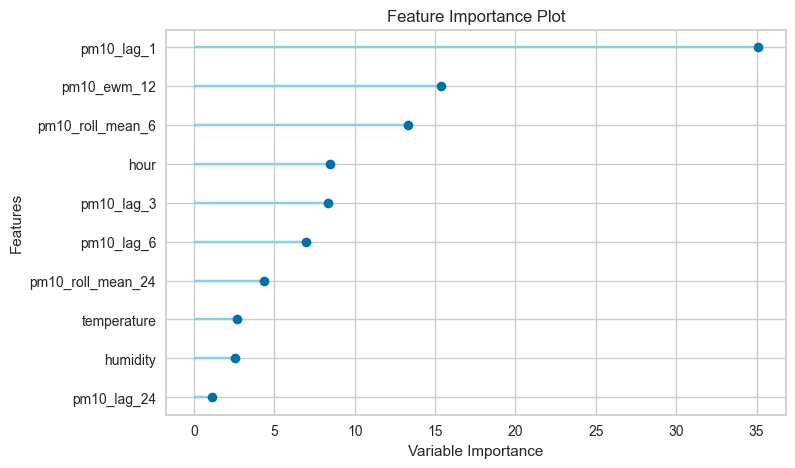

In [117]:
plot_model(best_model, plot="feature")

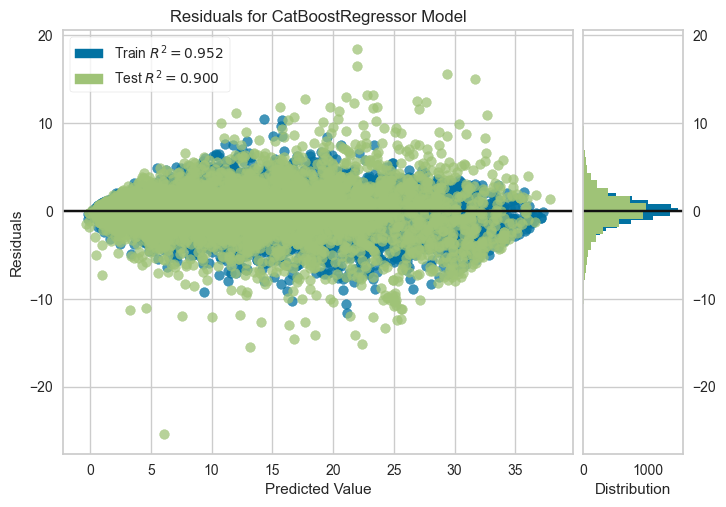

In [118]:
plot_model(best_model)

In [119]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8408,7.0024,2.6462,0.9140,0.2294,0.2568
1,2.0048,8.7753,2.9623,0.8919,0.2636,0.3114
2,2.0824,10.2734,3.2052,0.8724,0.2677,0.2936
3,1.9421,8.1790,2.8599,0.8988,0.2439,0.2560
4,2.0028,8.6678,2.9441,0.8985,0.2445,0.2764
5,2.0265,8.5739,2.9281,0.8898,0.2478,0.2738
6,1.9106,8.0462,2.8366,0.8934,0.2506,0.2578
7,1.9781,8.6446,2.9402,0.8914,0.2388,0.2615
8,1.8348,7.3196,2.7055,0.9080,0.2461,0.2570


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Save Model

In [120]:
save_model(tuned_model, "models/catboost_pm10_24h")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature', 'hour',
                                              'day', 'month', 'day_of_week',
                                              'pm10_lag_1', 'pm10_lag_3',
                                              'pm10_lag_6', 'pm10_lag_24',
                                              'pm10_roll_mean_6',
                                              'pm10_roll_mean_24',
                                              'pm10_ewm_12'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_f